# About Dataset
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here have build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses.

# Problem Statement:
The company wants to predict housing price (real-time) based on house detail as like area, square feet, build type, rooms, bathrooms, parking,street and others.The company have given a problem to predict the house price as per the customers requirement in Chennai.

# About all Columns

# We import all nessary librarys

In [1]:
# Suppressing WarningsW
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
#import dataset
df = pd.read_csv('Chennai_houseing.csv')

# Display top 5 rows of dataset

In [3]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,Ab Normal,Yes,15-05-1967,44,Commercial,AllPub,Paved,A,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,Ab Normal,No,22-12-1995,11,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,Ab Normal,Yes,09-02-1992,20,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,22,others,NoSewr,Paved,I,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,Ab Normal,Yes,13-10-1979,30,others,AllPub,Gravel,C,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,Adj Land,No,15-01-1962,49,others,ELO,NoAccess,RM,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,9,others,NoSeWa,NoAccess,RH,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,28,House,NoSeWa,Gravel,I,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,32,Commercial,ELO,Paved,RL,425350,119098,8507000


# Check last 5 rows of dataset

In [4]:
df.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,Adj Land,No,15-01-1962,49,others,ELO,NoAccess,RM,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,9,others,NoSeWa,NoAccess,RH,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,28,House,NoSeWa,Gravel,I,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,32,Commercial,ELO,Paved,RL,425350,119098,8507000
7108,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,24-07-1961,44,others,ELO,Paved,I,349177,79812,9976480


# Find shape of our dataset

In [5]:
df.shape

(7109, 19)

In [6]:
# Info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  Age(House)_Y   7109 non-null   int64  
 12  BUILDTYPE      7109 non-null   object 
 13  UTILITY_AVAIL  7109 non-null   object 
 14  STREET         7109 non-null   object 
 15  MZZONE         7109 non-null   object 
 16  REG_FEE        7109 non-null   int64  
 17  COMMIS         7109 non-null   int64  
 18  SALES_PR

# Check the null values of dataset

In [7]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        1
N_BATHROOM       5
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
Age(House)_Y     0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

#### "PRT_ID","DATE_SALE","DATE_BUILD" not inportant 

In [8]:
df.drop(["PRT_ID","DATE_SALE","DATE_BUILD"],axis=1,inplace=True)

In [9]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,Ab Normal,Yes,44,Commercial,AllPub,Paved,A,380000,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,Ab Normal,No,11,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,Adyar,909,70,1.0,1.0,3,Ab Normal,Yes,20,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,22,others,NoSewr,Paved,I,356321,77042,9630290
4,Karapakkam,1226,84,1.0,1.0,3,Ab Normal,Yes,30,others,AllPub,Gravel,C,237000,74063,7406250


### We replace missing values as like,for catagorial data with Mode values and for continuous data with Mean/median value

In [10]:
# Catagorical data-['N_BEDROOM','N_BATHROOM']
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
Age(House)_Y     0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

# Data Visualization

In [12]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

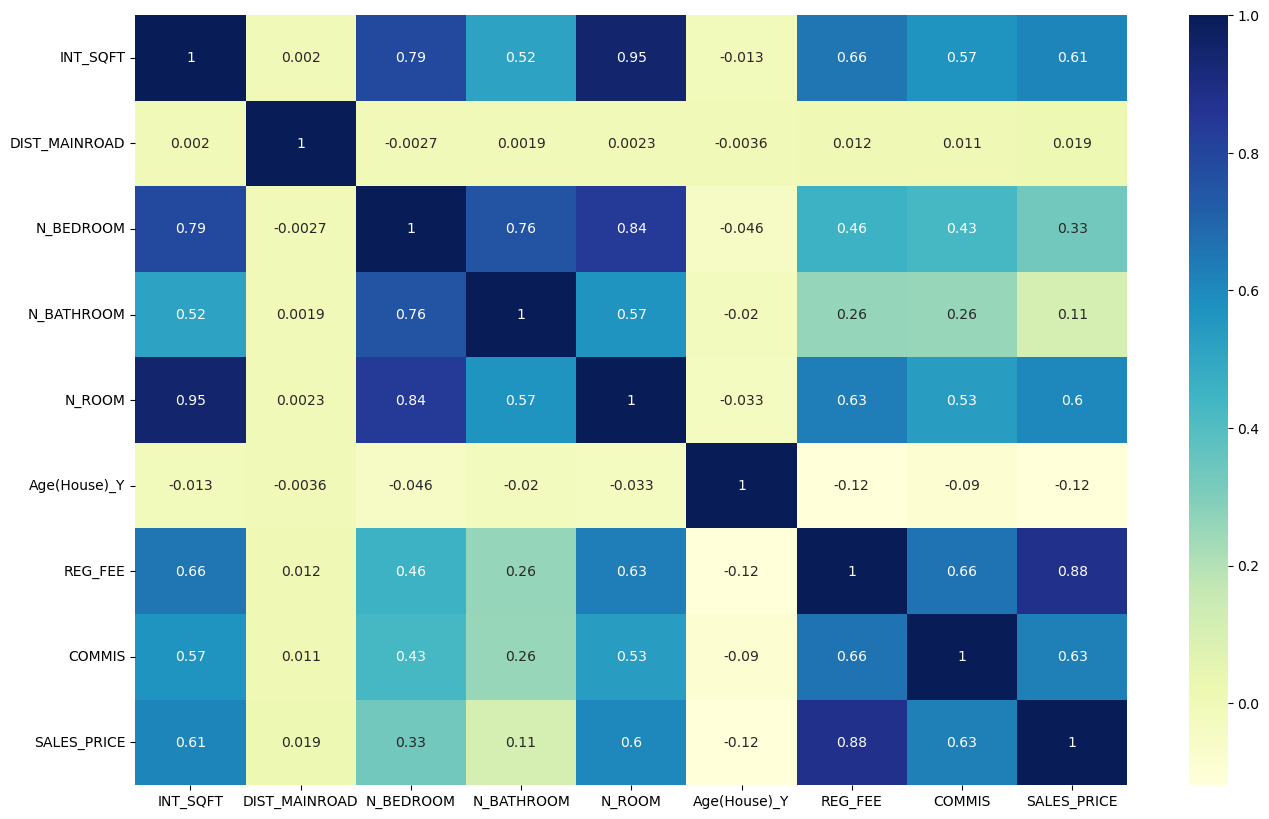

In [13]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

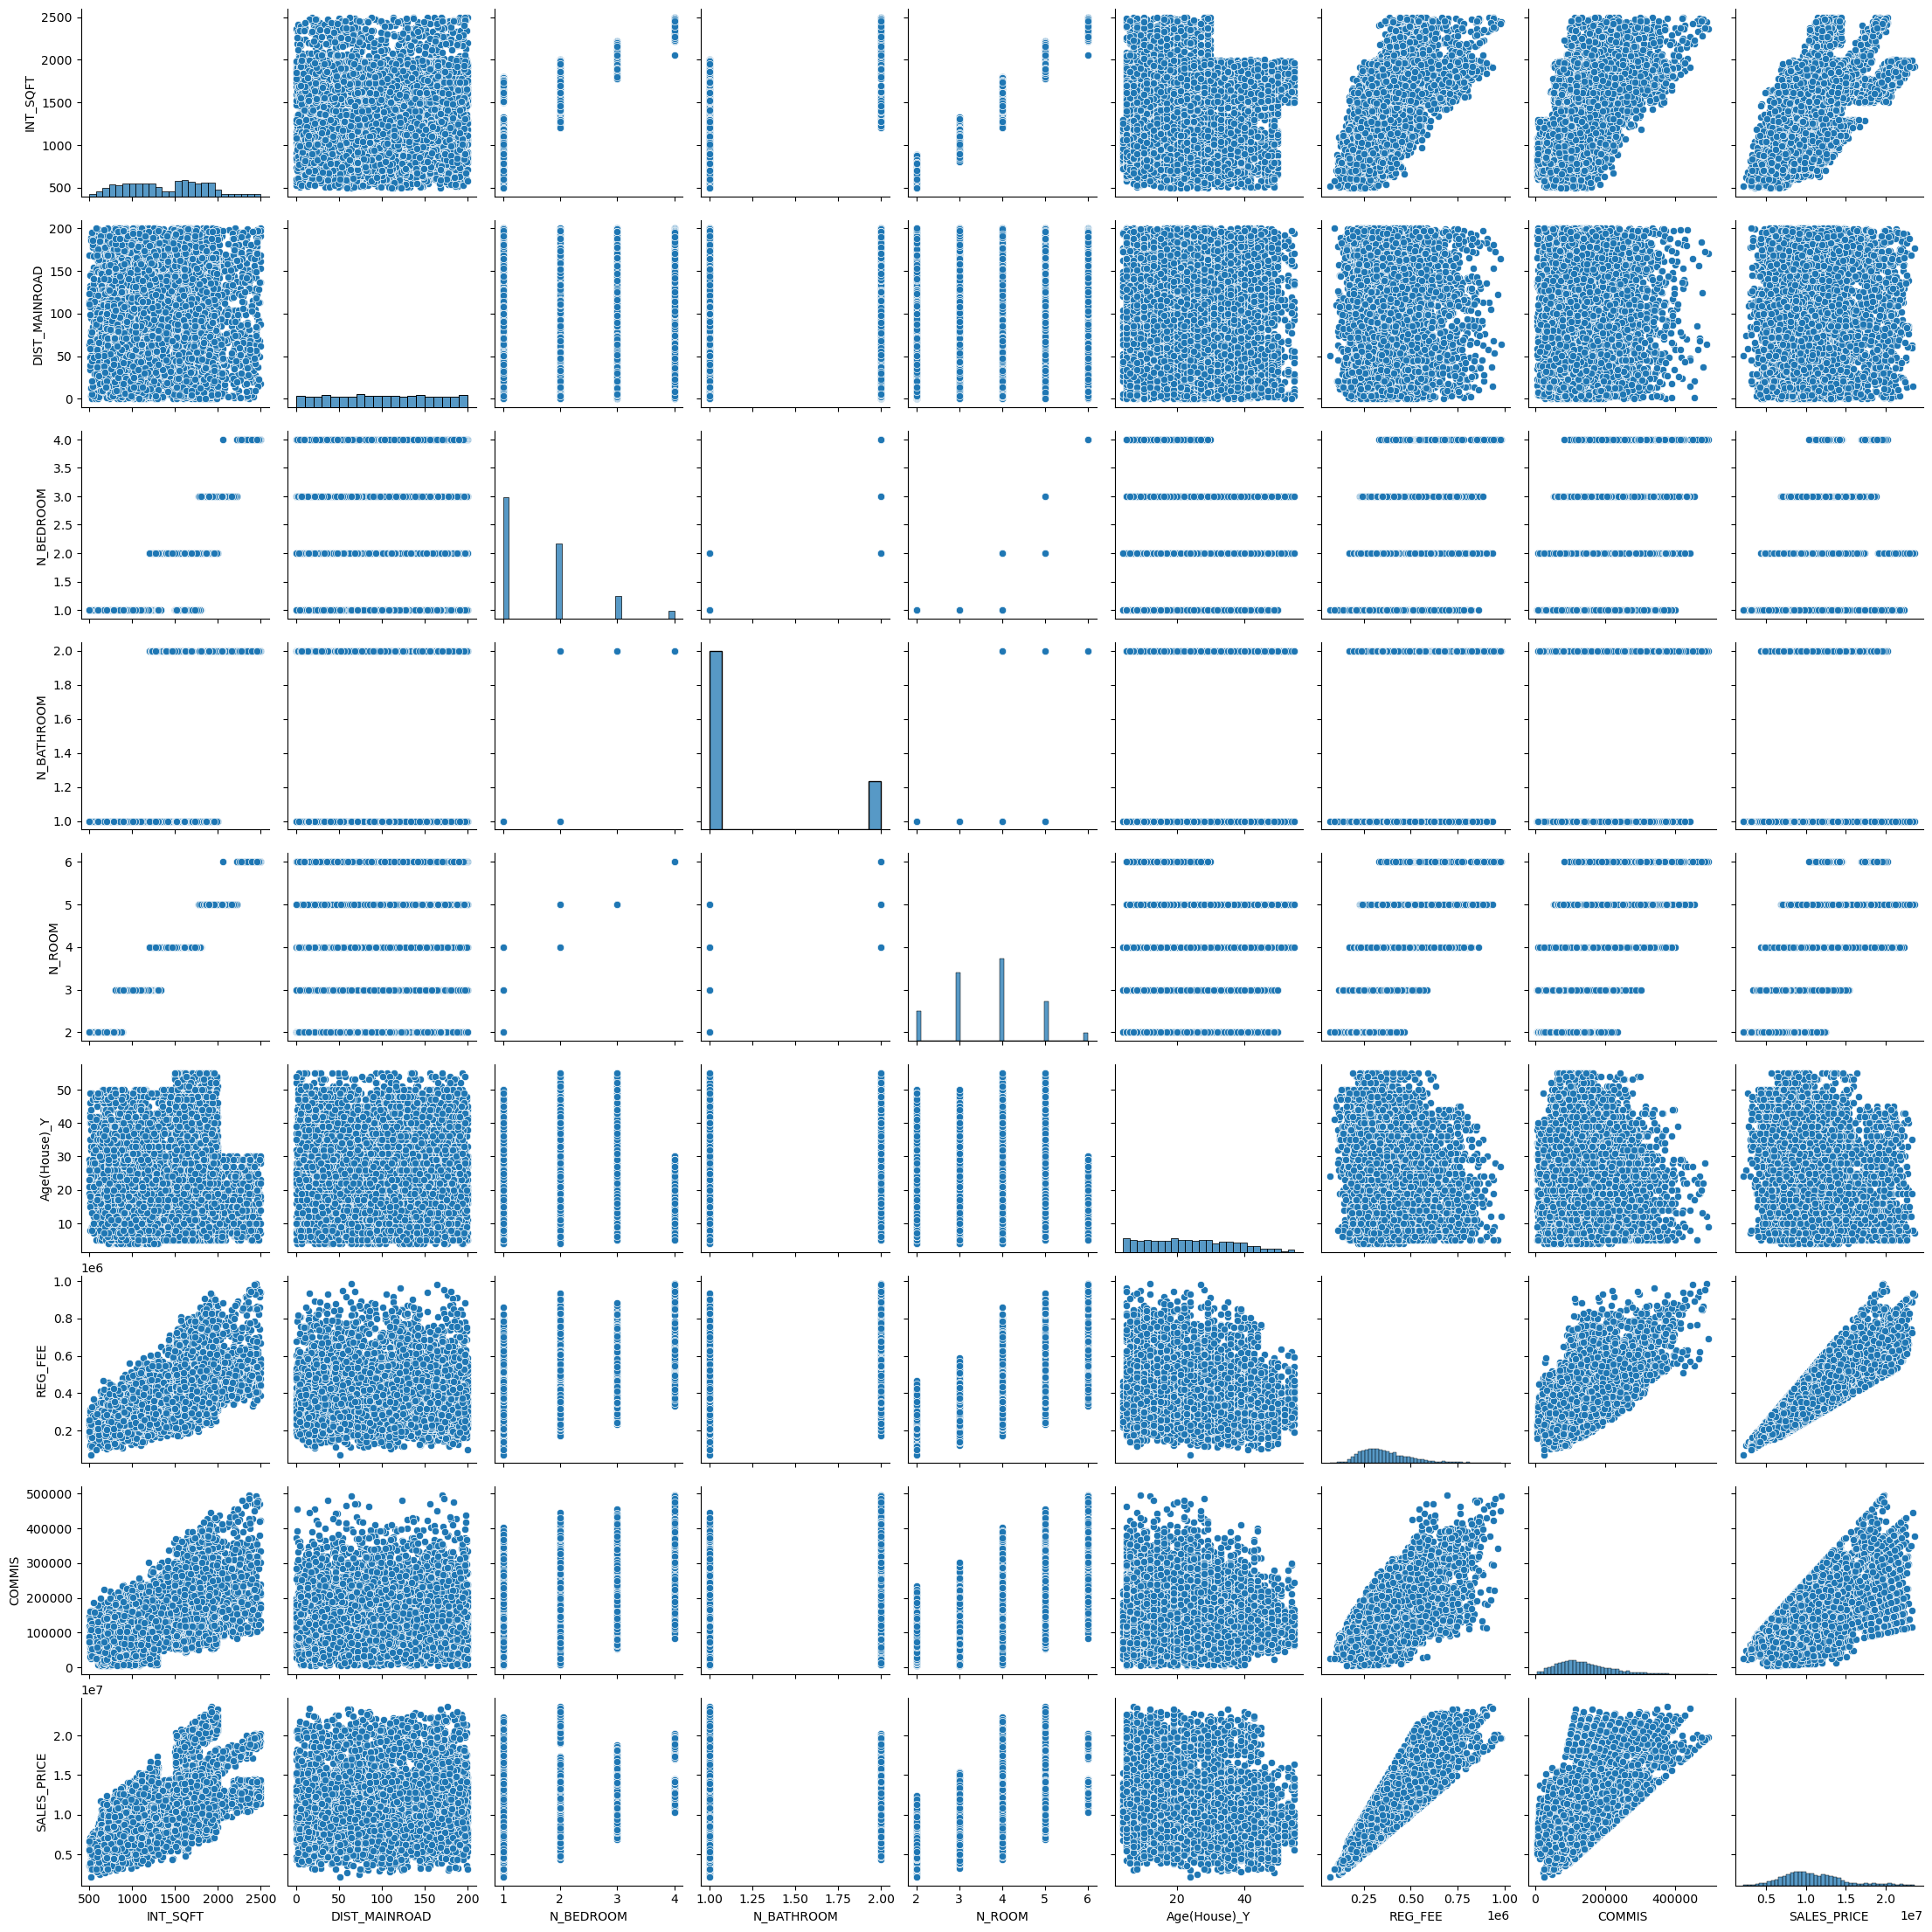

In [14]:
sns.pairplot(df)
plt.show()

([<matplotlib.patches.Wedge at 0x20a9cb7ce50>,
 [Text(0.8032484365231517, 0.7515264128579331, 'Karapakkam'),
  Text(-0.5628592660701728, 0.9450870047773098, 'Anna Nagar'),
  Text(-1.0999381315985275, -0.011666475712068141, 'Adyar'),
  Text(-0.6968574259037306, -0.8511108787712837, 'Velachery'),
  Text(0.10508232803705282, -1.0949692709543557, 'Chromepet'),
  Text(0.7782470962960003, -0.7773875848679629, 'K.K.Nagar'),
  Text(1.0731499132556381, -0.24155592246810362, 'T. Nagar')],
 [Text(0.43813551083081, 0.40992349792250893, '23.9%'),
  Text(-0.3070141451291851, 0.5155020026058053, '19.2%'),
  Text(-0.5999662535991968, -0.0063635322065826215, '14.0%'),
  Text(-0.3801040504929439, -0.4642422975116092, '13.8%'),
  Text(0.057317633474756075, -0.5972559659751031, '11.1%'),
  Text(0.4244984161614547, -0.4240295917461615, '10.9%'),
  Text(0.585354498139439, -0.13175777589169285, '7.0%')])

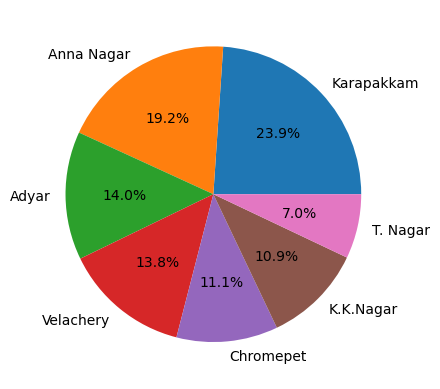

In [15]:
import matplotlib.pyplot as plt
import numpy as np

AREA = df["AREA"].value_counts()
labels = ['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chromepet',
       'K.K.Nagar', 'T. Nagar']
fig, ax = plt.subplots()
ax.pie(AREA, labels=labels, autopct='%1.1f%%')
 

([<matplotlib.patches.Wedge at 0x20a9cbd1e10>,
 [Text(0.8849784997513852, 0.6533093103406592, 'Adj Land'),
  Text(-0.36092999104320517, 1.0391003520187798, 'Partial'),
  Text(-1.099638689613724, -0.02819135159250105, 'Normal Sale'),
  Text(-0.31746637949842677, -1.0531928113541988, 'Ab Normal'),
  Text(0.895259666398784, -0.639147971693205, 'Family')],
 [Text(0.48271554531893734, 0.35635053291308677, '20.2%'),
  Text(-0.19687090420538464, 0.5667820101920616, '20.2%'),
  Text(-0.5998029216074858, -0.015377100868636936, '20.0%'),
  Text(-0.17316347972641458, -0.5744688061931993, '19.8%'),
  Text(0.48832345439933666, -0.34862616637811183, '19.7%')])

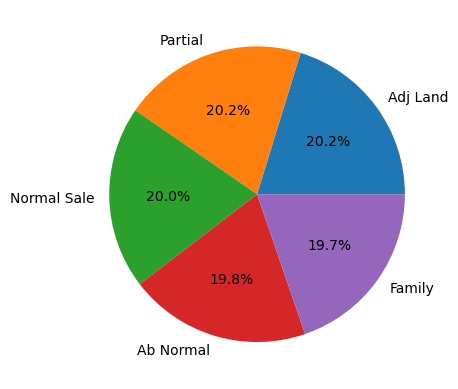

In [16]:
AREA = df['SALE_COND'].value_counts()
labels = ['Adj Land','Partial','Normal Sale','Ab Normal','Family']
fig, ax = plt.subplots()
ax.pie(AREA, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x20a9def2080>,
 [Text(0.7391931113018172, 0.8146125116912578, 'AllPub'),
  Text(-0.8777068736327874, 0.6630464870412619, 'NoSeWa'),
  Text(-0.6052795109847768, -0.9184969861583813, 'NoSewr'),
  Text(0.8604257548447165, -0.6853229314709234, 'ELO')],
 [Text(0.40319624252826386, 0.4443340972861406, '26.5%'),
  Text(-0.4787492037997022, 0.36166172020432463, '26.3%'),
  Text(-0.33015246053715097, -0.5009983560863898, '25.7%'),
  Text(0.4693231390062089, -0.3738125080750491, '21.4%')])

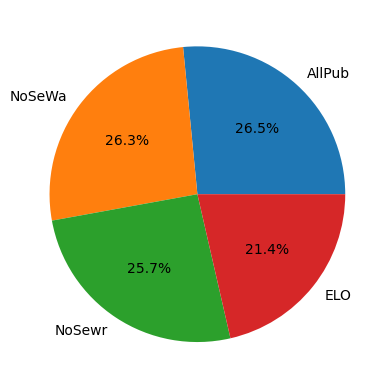

In [17]:
UTILITY_AVAIL = df['UTILITY_AVAIL'].value_counts()
labels = ['AllPub','NoSeWa','NoSewr','ELO']
fig, ax = plt.subplots()
ax.pie(UTILITY_AVAIL, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x20a9dfac940>,
 [Text(0.7495718966393733, 0.8050726499940566, 'RL'),
  Text(-0.8453852501980694, 0.7037924258952689, 'RH'),
  Text(-0.6717406667048348, -0.8710708792600889, 'RM'),
  Text(0.41730009780515426, -1.0177723853454705, 'C'),
  Text(0.8403879092366955, -0.7097521835181461, 'A'),
  Text(1.0705276283497227, -0.25292409323731513, 'I')],
 [Text(0.40885739816693084, 0.4391305363603945, '26.1%'),
  Text(-0.4611192273807651, 0.38388677776105573, '25.6%'),
  Text(-0.3664040000208189, -0.475129570505503, '25.6%'),
  Text(0.22761823516644775, -0.5551485738248021, '7.7%'),
  Text(0.4583934050381975, -0.38713755464626143, '7.6%'),
  Text(0.5839241609180306, -0.13795859631126278, '7.4%')])

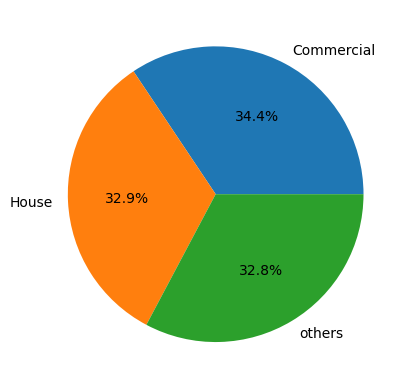

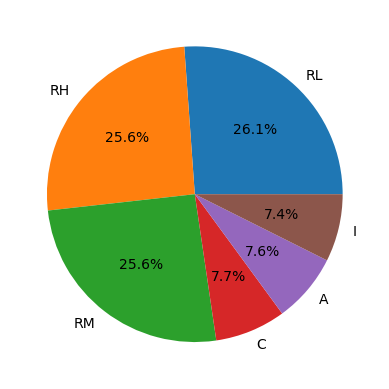

In [18]:
BUILDTYPE= df['BUILDTYPE'].value_counts()
labels = ['Commercial','House','others']
fig, ax = plt.subplots()
ax.pie(BUILDTYPE, labels=labels, autopct='%1.1f%%')
MZZONE= df['MZZONE'].value_counts()
labels = ['RL', 'RH', 'RM', 'C', 'A', 'I']
fig, ax = plt.subplots()
ax.pie(MZZONE, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x20a9df2f550>,
 [Text(0.7495718966393733, 0.8050726499940566, 'RL'),
  Text(-0.8453852501980694, 0.7037924258952689, 'RH'),
  Text(-0.6717406667048348, -0.8710708792600889, 'RM'),
  Text(0.41730009780515426, -1.0177723853454705, 'C'),
  Text(0.8403879092366955, -0.7097521835181461, 'A'),
  Text(1.0705276283497227, -0.25292409323731513, 'I')],
 [Text(0.40885739816693084, 0.4391305363603945, '26.1%'),
  Text(-0.4611192273807651, 0.38388677776105573, '25.6%'),
  Text(-0.3664040000208189, -0.475129570505503, '25.6%'),
  Text(0.22761823516644775, -0.5551485738248021, '7.7%'),
  Text(0.4583934050381975, -0.38713755464626143, '7.6%'),
  Text(0.5839241609180306, -0.13795859631126278, '7.4%')])

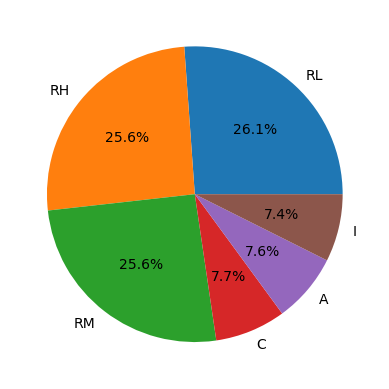

In [19]:
MZZONE= df['MZZONE'].value_counts()
labels = ['RL', 'RH', 'RM', 'C', 'A', 'I']
fig, ax = plt.subplots()
ax.pie(MZZONE, labels=labels, autopct='%1.1f%%')

In [20]:
df.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,Ab Normal,Yes,44,Commercial,AllPub,Paved,A,380000,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,Ab Normal,No,11,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,Adyar,909,70,1.0,1.0,3,Ab Normal,Yes,20,Commercial,ELO,Gravel,RL,421094,92114,13159200


([<matplotlib.patches.Wedge at 0x20a9e00ac50>,
 [Text(0.4627373484377795, 0.9979349409459383, 'Paved'),
  Text(-1.0670804825807751, -0.26709407274438, 'Graval'),
  Text(0.6912004552639157, -0.8557113594214791, 'NoAccess')],
 [Text(0.2524021900569706, 0.5443281496068754, '36.2%'),
  Text(-0.5820438995895136, -0.14568767604238908, '35.4%'),
  Text(0.37701843014395403, -0.46675165059353396, '28.4%')])

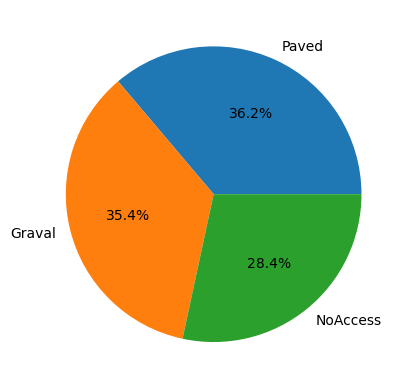

In [21]:
AREA = df["STREET"].value_counts()
labels = ["Paved",'Graval','NoAccess']
fig, ax = plt.subplots()
ax.pie(AREA, labels=labels, autopct='%1.1f%%')
 

([<matplotlib.patches.Wedge at 0x20a9e06de40>,
 [Text(-0.015798035847026555, 1.0998865496329047, 'YES'),
  Text(0.01579803584702642, -1.0998865496329047, 'NO')],
 [Text(-0.008617110462014483, 0.5999381179815844, '50.5%'),
  Text(0.008617110462014408, -0.5999381179815844, '49.5%')])

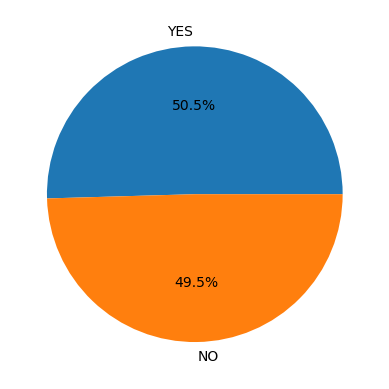

In [22]:
AREA = df["PARK_FACIL"].value_counts()
labels = ['YES','NO']
fig, ax = plt.subplots()
ax.pie(AREA, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x20a9e0d08e0>,
 [Text(-0.11717266355857946, 1.0937415448425594, 'R1'),
  Text(-0.34389224416917213, -1.0448627299316837, 'R2'),
  Text(0.9452113110991179, -0.5626504930863269, 'R3'),
  Text(1.0930775870620122, -0.12321277800086053, 'R4')],
 [Text(-0.06391236194104334, 0.5965862971868504, '53.4%'),
  Text(-0.18757758772863933, -0.5699251254172819, '33.1%'),
  Text(0.5155698060540642, -0.3069002689561782, '9.9%'),
  Text(0.5962241383974611, -0.0672069698186512, '3.6%')])

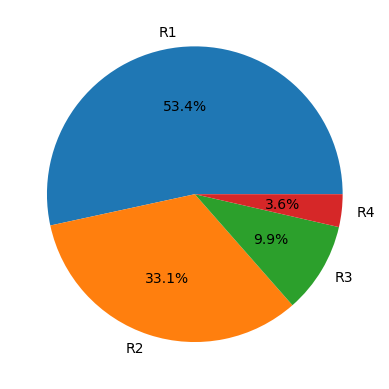

In [23]:
AREA = df["N_BEDROOM"].value_counts()
labels = ['R1','R2','R3','R4']
fig, ax = plt.subplots()
ax.pie(AREA, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x20a9e138340>,
 [Text(-0.8625416637715823, 0.6826579511425549, 'B1'),
  Text(0.8625416637715821, -0.682657951142555, 'B2')],
 [Text(-0.4704772711481357, 0.37235888244139353, '78.7%'),
  Text(0.47047727114813565, -0.37235888244139365, '21.3%')])

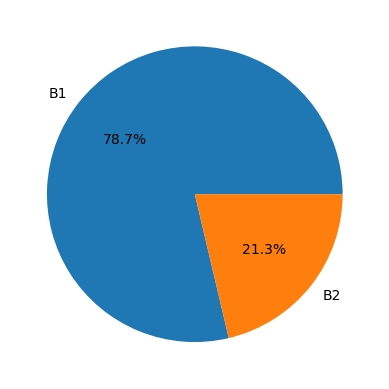

In [24]:
AREA = df["N_BATHROOM"].value_counts()
labels = ['B1','B2']
fig, ax = plt.subplots()
ax.pie(AREA, labels=labels, autopct='%1.1f%%')

### As we might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

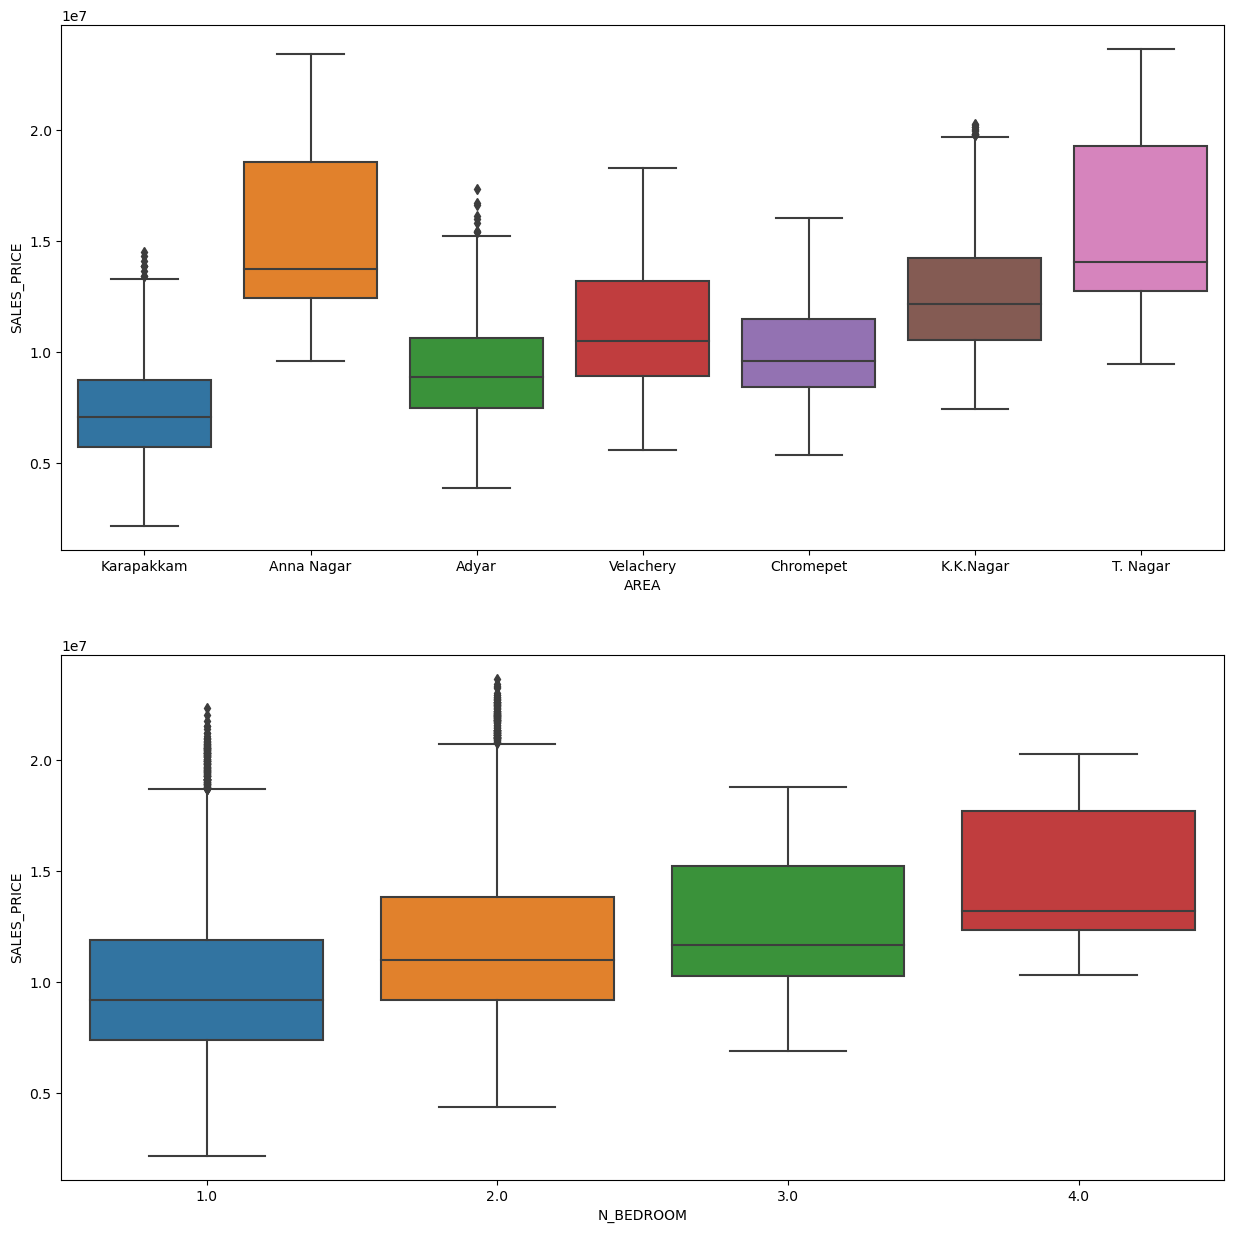

In [25]:
plt.figure(figsize=(15, 15))
plt.subplot(2,1,1)
sns.boxplot(x = 'AREA', y = 'SALES_PRICE', data = df)
plt.subplot(2,1,2)
sns.boxplot(x = 'N_BEDROOM', y = 'SALES_PRICE', data = df)
plt.show()

In [26]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,Ab Normal,Yes,44,Commercial,AllPub,Paved,A,380000,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,Ab Normal,No,11,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,Adyar,909,70,1.0,1.0,3,Ab Normal,Yes,20,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,Velachery,1855,14,3.0,2.0,5,Family,No,22,others,NoSewr,Paved,I,356321,77042,9630290
4,Karapakkam,1226,84,1.0,1.0,3,Ab Normal,Yes,30,others,AllPub,Gravel,C,237000,74063,7406250


<Axes: xlabel='DIST_MAINROAD'>

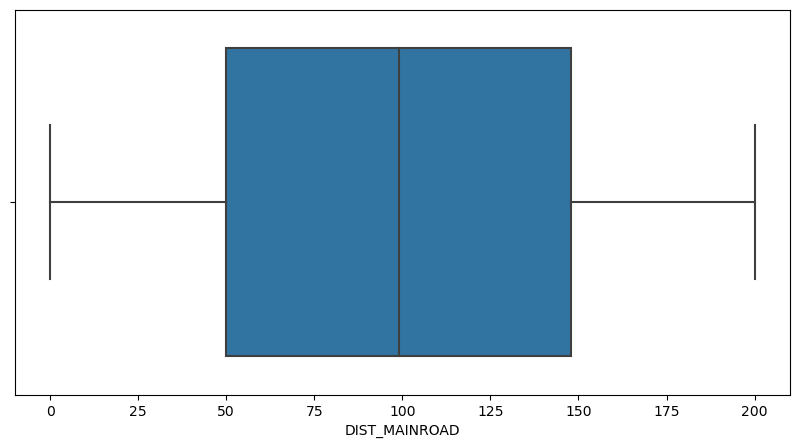

In [27]:
plt.figure(figsize=(10, 5))
sns.boxplot(x= 'DIST_MAINROAD', data = df)

### 1.here we see sale price is high area wise.here T. Nagar and Anna Nagar is more high than other place.


### 2.here no of bedroom also effect on sale price.if increase no of bedroom price also increase

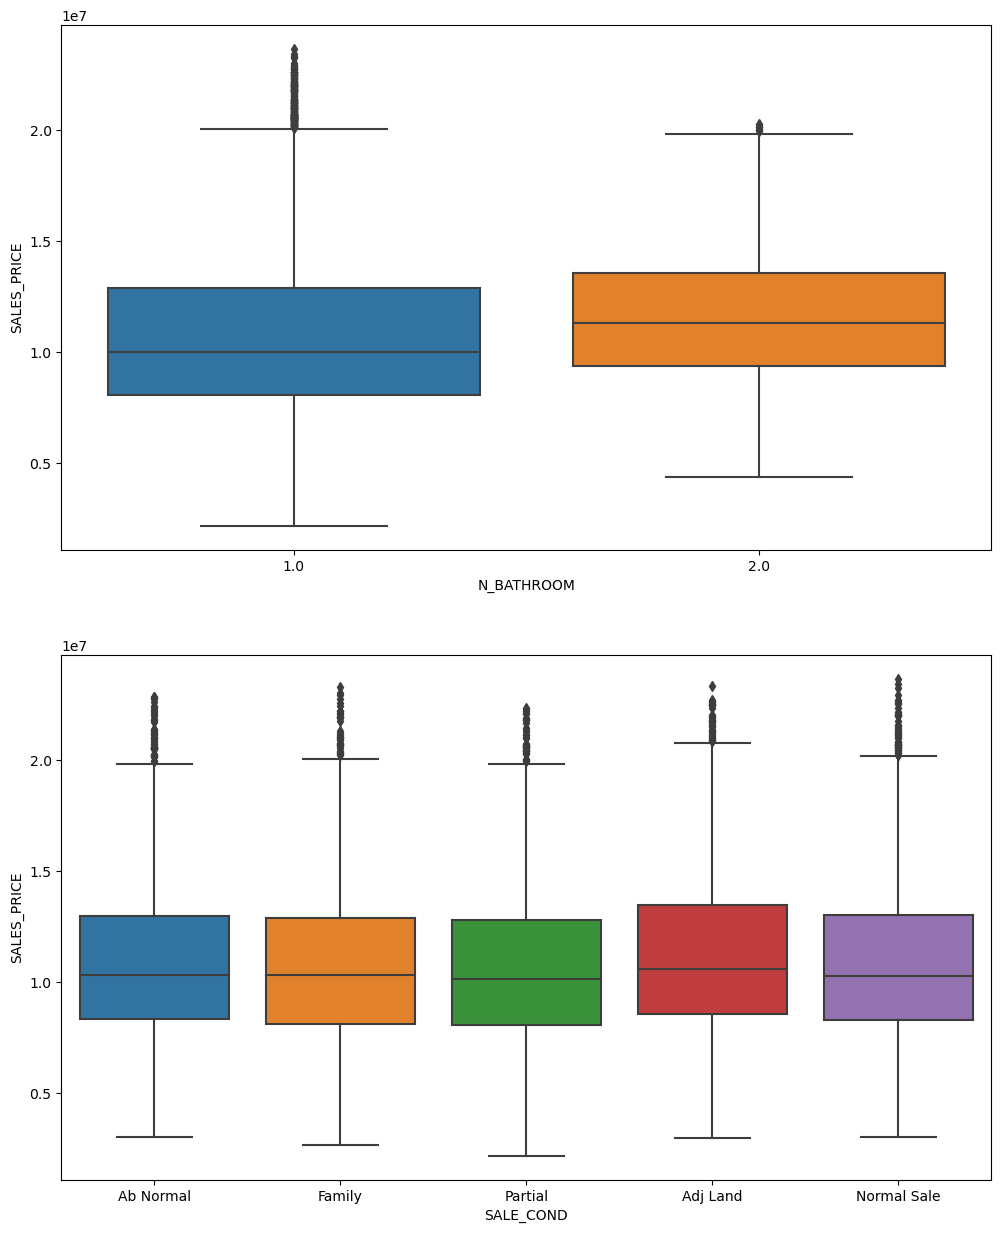

In [28]:
plt.figure(figsize=(12, 15))
plt.subplot(2,1,1)
sns.boxplot(x = 'N_BATHROOM', y = 'SALES_PRICE', data = df)
plt.subplot(2,1,2)
sns.boxplot(x = 'SALE_COND', y = 'SALES_PRICE', data = df)
plt.show()

1.Ab Normal = Trsder,forecloser etc
2.Adj Land = Adjoining Land Purchase
3.Family = sale between family member
4.Normal Sale = normaly sale
5.Partial = Home was not completed when last assessed (associated with New Homes)

### here,if no of bathroom is 2 the price will high little bit.


### in sale condition for adj land the sale price little bit high.

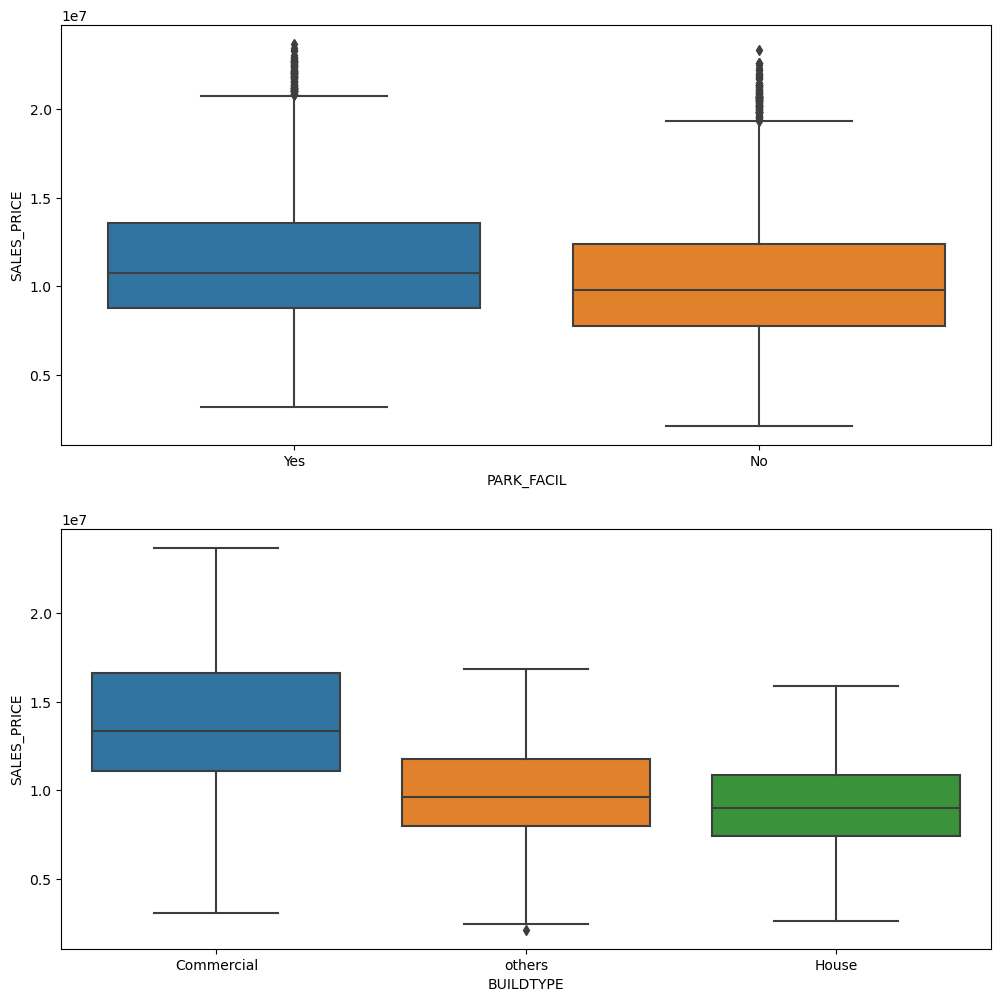

In [29]:
plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'PARK_FACIL', y = 'SALES_PRICE', data = df)
plt.subplot(2,1,2)
sns.boxplot(x = 'BUILDTYPE', y = 'SALES_PRICE', data = df)
plt.show()

### here if parking facility is yes the price is high

### for buildtype commercial propertys price is more high than others and house.

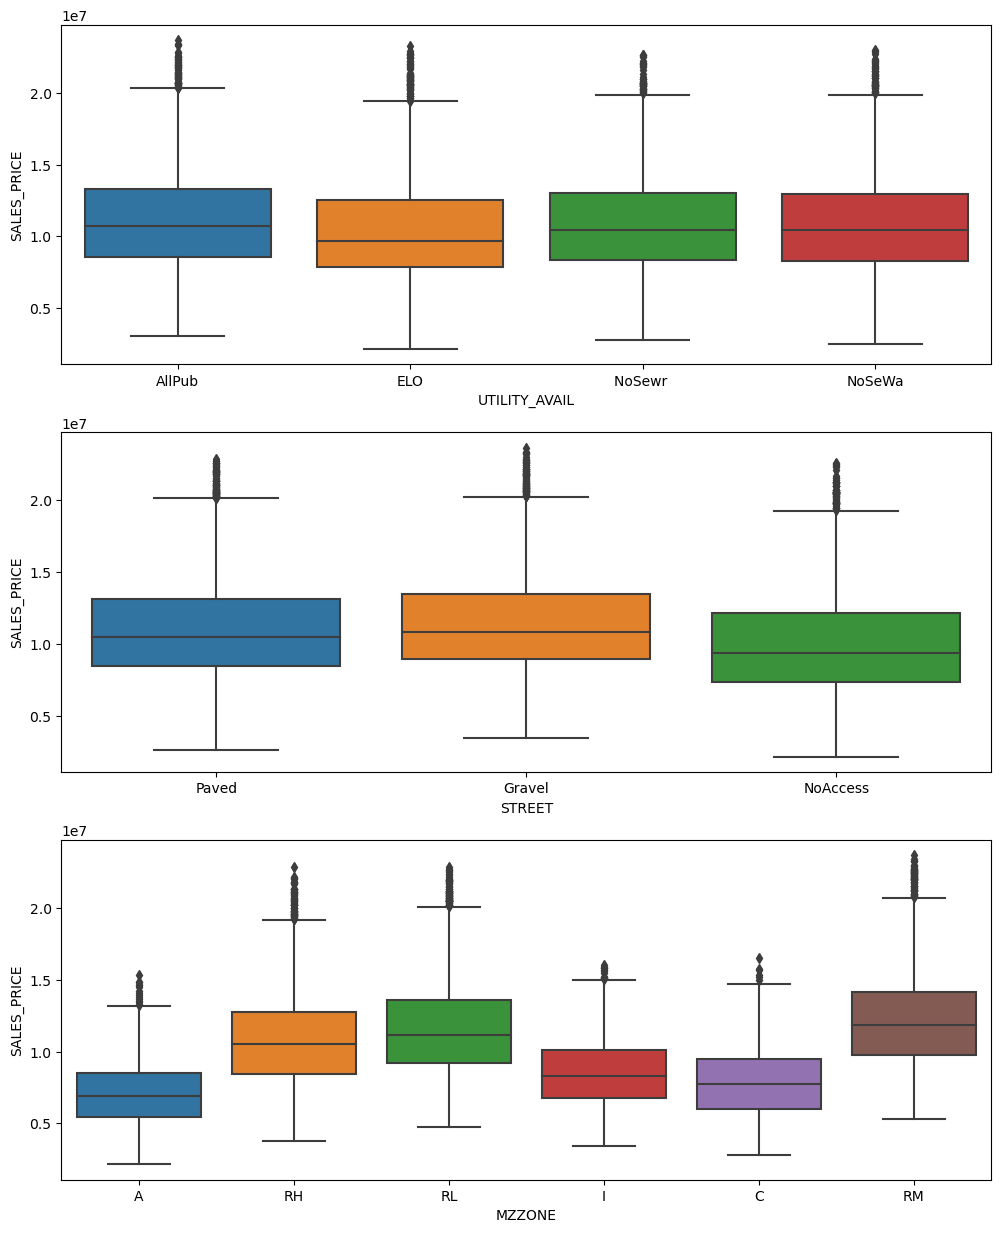

In [30]:
plt.figure(figsize=(12, 15))
plt.subplot(3,1,1)
sns.boxplot(x = 'UTILITY_AVAIL', y = 'SALES_PRICE', data = df)
plt.subplot(3,1,2)
sns.boxplot(x = 'STREET', y = 'SALES_PRICE', data = df)
plt.subplot(3,1,3)
sns.boxplot(x = 'MZZONE', y = 'SALES_PRICE', data = df)
plt.show()

#### UTILITY_AVAIL

AllPub  = All public Utilities (E,G,W,& S)
NoSeWa  = Electricity and Gas Only
NoSewr  = Electricity,gas And Water(Saptic tank)
ELO = Electricity only

### MZZONE

RL  =  Residential Low Density
RH  =  Residential High Density
RM  =  Residential Medium Density
C   =  Commercial
A   =  Agriculture
I   =  Industrial 

### here we see for UTILITY_AVAIL,YLO types are little low price than others type

### we see price low only no access street

#### Then we see for RM,RL the price are high than others like RH,A,I,C

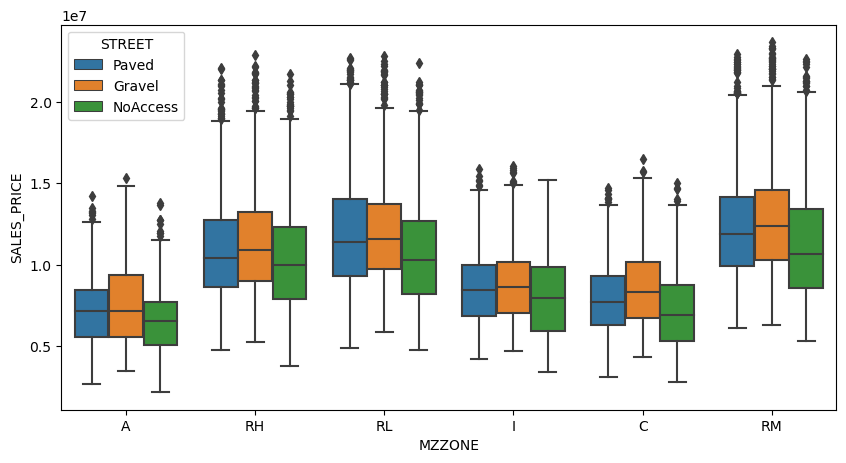

In [31]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'MZZONE', y = 'SALES_PRICE', hue = 'STREET', data = df)
plt.show()

### in this box plot we see every typy of MZZONE for Gravel street the price is high except RL(Residential Low Density).

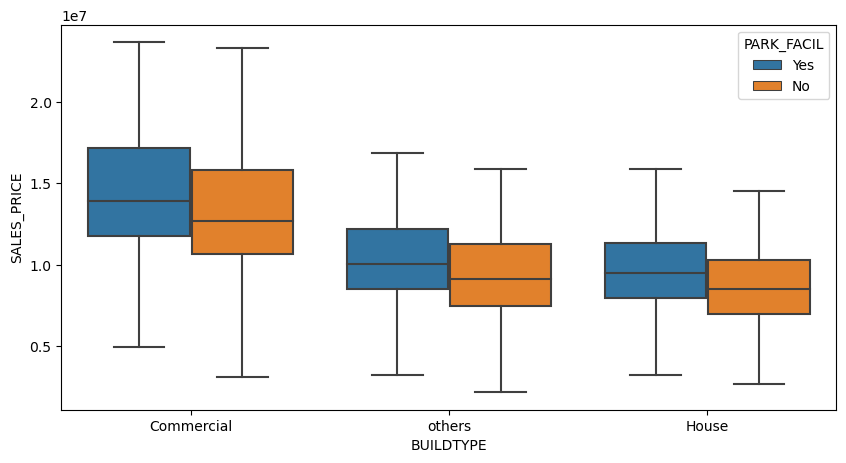

In [32]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'BUILDTYPE', y = 'SALES_PRICE', hue = 'PARK_FACIL', data = df)
plt.show()

#### here we see for commercial property if there has parking facialitys then the price is high, also house and others type of property which has parking facelitys price is high.over all commercial properties price high than others and house

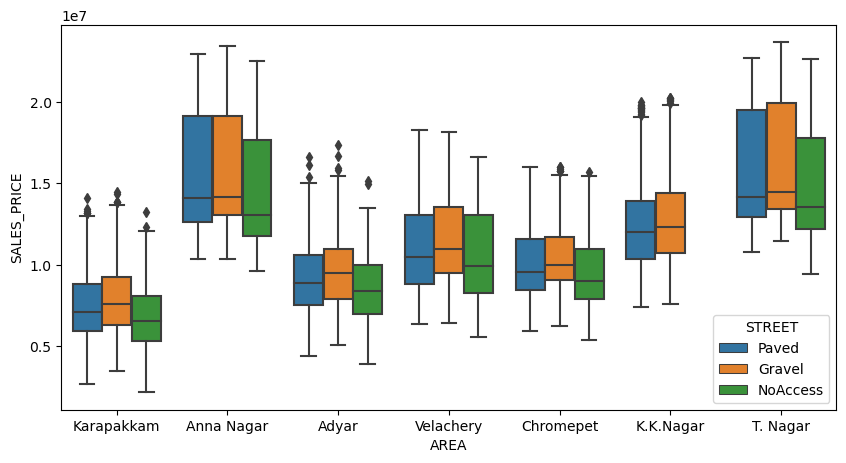

In [33]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'AREA', y = 'SALES_PRICE', hue = 'STREET', data = df)
plt.show()

#### here we see Anna Nagar and T.Nagar for gravel road sale price is high.

# Data Preparation

### Handling catagorical columns with lable encoading and dummy variables.

### 1.lable encoding

In [34]:
df.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,131,1.0,1.0,3,Ab Normal,Yes,44,Commercial,AllPub,Paved,A,380000,144400,7600000
1,Anna Nagar,1986,26,2.0,1.0,5,Ab Normal,No,11,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,Adyar,909,70,1.0,1.0,3,Ab Normal,Yes,20,Commercial,ELO,Gravel,RL,421094,92114,13159200


In [35]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chromepet',
       'K.K.Nagar', 'T. Nagar'], dtype=object)

In [36]:
df["AREA"].value_counts()

Chromepet     1702
Karapakkam    1366
K.K.Nagar      997
Velachery      981
Anna Nagar     788
Adyar          774
T. Nagar       501
Name: AREA, dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
lble = LabelEncoder()
lble

LabelEncoder()

In [39]:
df["AREA"] = lble.fit_transform(df["AREA"])

In [40]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1.0,1.0,3,Ab Normal,Yes,44,Commercial,AllPub,Paved,A,380000,144400,7600000
1,1,1986,26,2.0,1.0,5,Ab Normal,No,11,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,0,909,70,1.0,1.0,3,Ab Normal,Yes,20,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,6,1855,14,3.0,2.0,5,Family,No,22,others,NoSewr,Paved,I,356321,77042,9630290
4,4,1226,84,1.0,1.0,3,Ab Normal,Yes,30,others,AllPub,Gravel,C,237000,74063,7406250


In [41]:
df["AREA"].value_counts()

2    1702
4    1366
3     997
6     981
1     788
0     774
5     501
Name: AREA, dtype: int64

In [42]:
df["PARK_FACIL"].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [43]:
df["PARK_FACIL"] = lble.fit_transform(df["PARK_FACIL"])

In [44]:
df["PARK_FACIL"].value_counts()

1    3587
0    3522
Name: PARK_FACIL, dtype: int64

In [45]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1.0,1.0,3,Ab Normal,1,44,Commercial,AllPub,Paved,A,380000,144400,7600000
1,1,1986,26,2.0,1.0,5,Ab Normal,0,11,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,0,909,70,1.0,1.0,3,Ab Normal,1,20,Commercial,ELO,Gravel,RL,421094,92114,13159200
3,6,1855,14,3.0,2.0,5,Family,0,22,others,NoSewr,Paved,I,356321,77042,9630290
4,4,1226,84,1.0,1.0,3,Ab Normal,1,30,others,AllPub,Gravel,C,237000,74063,7406250


#### SALE_COND

In [46]:
df["SALE_COND"].value_counts()

Adj Land       1439
Partial        1433
Normal Sale    1423
Ab Normal      1411
Family         1403
Name: SALE_COND, dtype: int64

In [47]:
df["SALE_COND"] = lble.fit_transform(df["SALE_COND"])

In [48]:
df["SALE_COND"].value_counts()

1    1439
4    1433
3    1423
0    1411
2    1403
Name: SALE_COND, dtype: int64

In [49]:
df.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1.0,1.0,3,0,1,44,Commercial,AllPub,Paved,A,380000,144400,7600000
1,1,1986,26,2.0,1.0,5,0,0,11,Commercial,AllPub,Gravel,RH,760122,304049,21717770
2,0,909,70,1.0,1.0,3,0,1,20,Commercial,ELO,Gravel,RL,421094,92114,13159200


### UTILITY_AVAIL

In [50]:
df["UTILITY_AVAIL"].value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [51]:
df["UTILITY_AVAIL"] = lble.fit_transform(df["UTILITY_AVAIL"])

In [52]:
df["UTILITY_AVAIL"].value_counts()

0    1887
2    1871
3    1829
1    1522
Name: UTILITY_AVAIL, dtype: int64

In [53]:
df.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1.0,1.0,3,0,1,44,Commercial,0,Paved,A,380000,144400,7600000
1,1,1986,26,2.0,1.0,5,0,0,11,Commercial,0,Gravel,RH,760122,304049,21717770
2,0,909,70,1.0,1.0,3,0,1,20,Commercial,1,Gravel,RL,421094,92114,13159200


In [54]:
df["MZZONE"].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [55]:
df["MZZONE"] = lble.fit_transform(df["MZZONE"])

In [56]:
df["MZZONE"].value_counts()

4    1858
3    1822
5    1817
1     550
0     537
2     525
Name: MZZONE, dtype: int64

### MZZONE

In [57]:
df.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1.0,1.0,3,0,1,44,Commercial,0,Paved,0,380000,144400,7600000
1,1,1986,26,2.0,1.0,5,0,0,11,Commercial,0,Gravel,3,760122,304049,21717770
2,0,909,70,1.0,1.0,3,0,1,20,Commercial,1,Gravel,4,421094,92114,13159200


### STREET

In [58]:
df["STREET"].value_counts()

Paved       2572
Gravel      2520
NoAccess    2017
Name: STREET, dtype: int64

In [59]:
df["STREET"] = lble.fit_transform(df["STREET"])

In [60]:
df["STREET"].value_counts()

2    2572
0    2520
1    2017
Name: STREET, dtype: int64

In [61]:
df["BUILDTYPE"].value_counts()

House         2444
others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [62]:
df.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE
0,4,1004,131,1.0,1.0,3,0,1,44,Commercial,0,2,0,380000,144400,7600000
1,1,1986,26,2.0,1.0,5,0,0,11,Commercial,0,0,3,760122,304049,21717770
2,0,909,70,1.0,1.0,3,0,1,20,Commercial,1,0,4,421094,92114,13159200


In [63]:
#Get the dummy variables for the feature 'BUILDTYPE' and store it in a new variable - 'bt'
bt = pd.get_dummies(df['BUILDTYPE'])

In [64]:
bt.head()

,Commercial,House,others
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1


In [65]:
bt = pd.get_dummies(df['BUILDTYPE'], drop_first = True)

In [66]:
bt.head()

,House,others
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1


In [67]:
df=pd.concat([df,bt], axis=1)

In [68]:
df.drop(["BUILDTYPE"], axis = 1 ,inplace = True)

In [69]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,House,others
0,4,1004,131,1.0,1.0,3,0,1,44,0,2,0,380000,144400,7600000,0,0
1,1,1986,26,2.0,1.0,5,0,0,11,0,0,3,760122,304049,21717770,0,0
2,0,909,70,1.0,1.0,3,0,1,20,1,0,4,421094,92114,13159200,0,0
3,6,1855,14,3.0,2.0,5,2,0,22,3,2,2,356321,77042,9630290,0,1
4,4,1226,84,1.0,1.0,3,0,1,30,0,0,1,237000,74063,7406250,0,1


# Splitting the Data into Training and Testing Set

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
df_train,df_test = train_test_split (df,train_size = 0.7,test_size = 0.3,random_state=100)

In [72]:
df_train.shape

(4976, 17)

In [73]:
df_test.shape

(2133, 17)

# Rescaling the Features

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scal = MinMaxScaler()
scal

MinMaxScaler()

In [76]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM','SALE_COND','Age(House)_Y','UTILITY_AVAIL','STREET','MZZONE','REG_FEE','COMMIS','SALES_PRICE']

df_train[num_vars] = scal.fit_transform(df_train[num_vars])

In [77]:
df_train.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,House,others
3879,1.000000,0.6620,0.615,0.666667,1.0,0.75,0.75,0,0.529412,0.000000,0.5,0.0,0.179458,0.257479,0.221018,1,0
5468,0.666667,0.2835,0.375,0.000000,0.0,0.25,0.25,0,0.450980,0.000000,1.0,1.0,0.185465,0.226973,0.260333,1,0
1098,0.500000,0.6315,0.395,0.333333,0.0,0.50,0.00,1,0.294118,0.666667,0.0,1.0,0.469238,0.610790,0.466069,0,1
3737,0.500000,0.5415,0.310,0.333333,0.0,0.50,0.25,0,0.411765,0.666667,0.0,1.0,0.338024,0.277310,0.404077,0,1
2889,0.500000,0.9155,0.940,1.000000,1.0,1.00,1.00,0,0.509804,0.666667,0.0,1.0,0.918091,0.360512,0.745048,0,0


In [78]:
df_train.describe()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,House,others
count,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000
mean,0.493670,0.441279,0.500779,0.211080,0.210410,0.422830,0.499648,0.497387,0.395479,0.500268,0.508340,0.664912,0.335107,0.277619,0.405903,0.344453,0.328376
std,0.307344,0.227105,0.287743,0.266904,0.407641,0.253167,0.355272,0.500043,0.239973,0.379544,0.422223,0.298645,0.156012,0.159866,0.174134,0.475237,0.469670
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.249875,0.255000,0.000000,0.000000,0.250000,0.250000,0.000000,0.196078,0.000000,0.000000,0.600000,0.221447,0.162897,0.284386,0.000000,0.000000
50%,0.500000,0.435000,0.500000,0.000000,0.000000,0.500000,0.500000,0.000000,0.372549,0.666667,0.500000,0.800000,0.305683,0.251713,0.380439,0.000000,0.000000
75%,0.666667,0.621125,0.745000,0.333333,0.000000,0.500000,0.750000,1.000000,0.588235,1.000000,1.000000,1.000000,0.416449,0.366986,0.502430,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


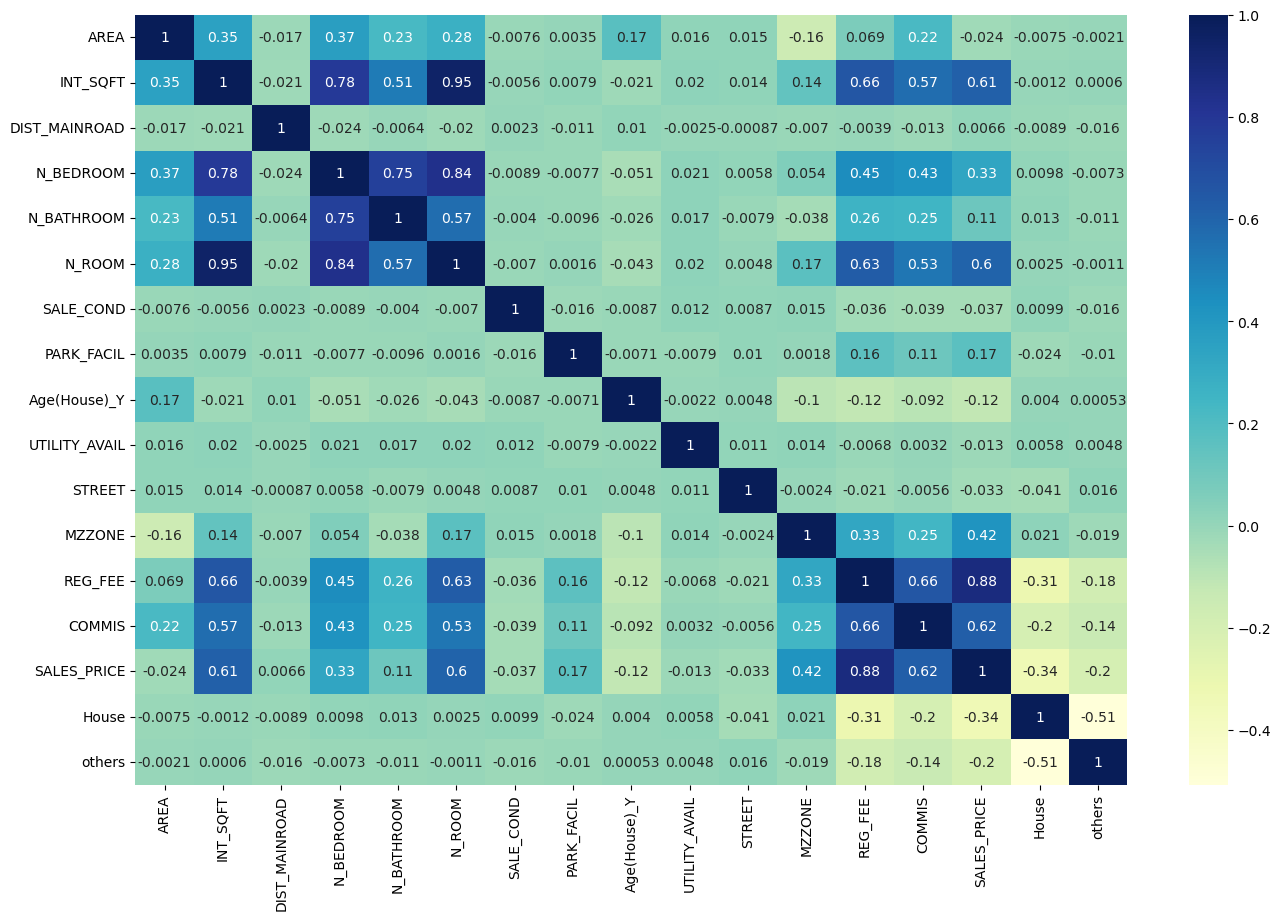

In [79]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# deviding into X and Y sets for the model building

In [80]:
y_train = df_train.pop("SALES_PRICE")
x_train = df_train 

In [81]:
y_train.head()

3879    0.221018
5468    0.260333
1098    0.466069
3737    0.404077
2889    0.745048
Name: SALES_PRICE, dtype: float64

In [82]:
x_train.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,House,others
3879,1.000000,0.6620,0.615,0.666667,1.0,0.75,0.75,0,0.529412,0.000000,0.5,0.0,0.179458,0.257479,1,0
5468,0.666667,0.2835,0.375,0.000000,0.0,0.25,0.25,0,0.450980,0.000000,1.0,1.0,0.185465,0.226973,1,0
1098,0.500000,0.6315,0.395,0.333333,0.0,0.50,0.00,1,0.294118,0.666667,0.0,1.0,0.469238,0.610790,0,1


# Bulding a linear model

## adding all the variable to the model

In [83]:
df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'Age(House)_Y', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'House',
       'others'],
      dtype='object')

In [84]:
x_train.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,House,others
3879,1.000000,0.6620,0.615,0.666667,1.0,0.75,0.75,0,0.529412,0.000000,0.5,0.0,0.179458,0.257479,1,0
5468,0.666667,0.2835,0.375,0.000000,0.0,0.25,0.25,0,0.450980,0.000000,1.0,1.0,0.185465,0.226973,1,0
1098,0.500000,0.6315,0.395,0.333333,0.0,0.50,0.00,1,0.294118,0.666667,0.0,1.0,0.469238,0.610790,0,1


In [85]:
import statsmodels.api as sm

In [86]:
x_train_lm = sm.add_constant(x_train)
lr_1 = sm.OLS(y_train,x_train_lm).fit()
lr_1.params

const            0.183231
AREA            -0.062435
INT_SQFT         0.228617
DIST_MAINROAD    0.003965
N_BEDROOM       -0.183050
N_BATHROOM      -0.049005
N_ROOM           0.302927
SALE_COND       -0.013833
PARK_FACIL       0.035715
Age(House)_Y    -0.025190
UTILITY_AVAIL   -0.006213
STREET          -0.017966
MZZONE           0.121680
REG_FEE          0.298111
COMMIS           0.011541
House           -0.162435
others          -0.137708
dtype: float64

In [87]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     3695.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:17:23   Log-Likelihood:                 8004.1
No. Observations:                4976   AIC:                        -1.597e+04
Df Residuals:                    4959   BIC:                        -1.586e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1832      0.004     45.171

### looking at the p-values DIST_MAINROAD is not really significant.

# checking VIF

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,INT_SQFT,68.62
5,N_ROOM,58.88
12,REG_FEE,21.29
3,N_BEDROOM,9.61
13,COMMIS,7.98
11,MZZONE,7.75
0,AREA,4.79
2,DIST_MAINROAD,3.65
8,Age(House)_Y,3.58
14,House,3.14


### we drop Dist_mainroad,it is not statistically significant

In [90]:
x = x_train.drop('DIST_MAINROAD',axis=1)

In [91]:
x_train_lm = sm.add_constant(x)
lr_2 = sm.OLS(y_train,x_train_lm).fit()

In [92]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     3940.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:17:24   Log-Likelihood:                 8002.8
No. Observations:                4976   AIC:                        -1.597e+04
Df Residuals:                    4960   BIC:                        -1.587e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1853      0.004     48.041

### commision p-values is high,means it is not statistically significant

In [93]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,INT_SQFT,68.50
4,N_ROOM,58.87
11,REG_FEE,20.70
2,N_BEDROOM,9.56
12,COMMIS,7.98
10,MZZONE,7.74
0,AREA,4.75
7,Age(House)_Y,3.53
3,N_BATHROOM,3.07
13,House,3.04


### we drop the column commision

In [94]:
x = x.drop('COMMIS', axis = 1)

In [95]:
x_train_lm = sm.add_constant(x)
lr_3 = sm.OLS(y_train,x_train_lm).fit()

In [96]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     4219.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:17:24   Log-Likelihood:                 8001.0
No. Observations:                4976   AIC:                        -1.597e+04
Df Residuals:                    4961   BIC:                        -1.587e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1861      0.004     48.546

In [97]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,INT_SQFT,67.13
4,N_ROOM,58.80
11,REG_FEE,19.24
2,N_BEDROOM,9.56
10,MZZONE,7.50
0,AREA,4.62
7,Age(House)_Y,3.52
3,N_BATHROOM,3.07
12,House,2.98
5,SALE_COND,2.75


### here INT_SQFT VIF value is high,means it also not important for our model.we can drop this column.

In [98]:
x = x.drop('INT_SQFT', axis = 1)

In [99]:
x_train_lm = sm.add_constant(x)
lr_4 = sm.OLS(y_train,x_train_lm).fit()

In [100]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     4167.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:17:24   Log-Likelihood:                 7802.8
No. Observations:                4976   AIC:                        -1.558e+04
Df Residuals:                    4962   BIC:                        -1.549e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1775      0.004     44.760

In [101]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,N_ROOM,21.78
10,REG_FEE,15.91
1,N_BEDROOM,9.53
9,MZZONE,7.20
0,AREA,4.07
6,Age(House)_Y,3.52
2,N_BATHROOM,3.06
11,House,2.76
4,SALE_COND,2.75
7,UTILITY_AVAIL,2.59


#### here n_room Vif value is high ,it also not important.we can drop it.

In [102]:
x = x.drop('N_ROOM', axis = 1)

In [103]:
x_train_lm = sm.add_constant(x)
lr_5 = sm.OLS(y_train,x_train_lm).fit()

In [104]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2083.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:17:24   Log-Likelihood:                 6110.8
No. Observations:                4976   AIC:                        -1.220e+04
Df Residuals:                    4963   BIC:                        -1.211e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1479      0.006     26.715

### after drop no of room column, age of house's p value is high .thats also not important for our model.so we drop it.

In [105]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,REG_FEE,9.22
8,MZZONE,7.15
1,N_BEDROOM,5.11
0,AREA,4.06
5,Age(House)_Y,3.51
2,N_BATHROOM,3.02
3,SALE_COND,2.75
6,UTILITY_AVAIL,2.59
7,STREET,2.31
10,House,2.29


### we drop house age column and fit again.

In [106]:
x = x.drop('Age(House)_Y', axis = 1)

In [107]:
x_train_lm = sm.add_constant(x)
lr_6= sm.OLS(y_train,x_train_lm).fit()

In [108]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2273.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:17:24   Log-Likelihood:                 6110.6
No. Observations:                4976   AIC:                        -1.220e+04
Df Residuals:                    4964   BIC:                        -1.212e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1469      0.005     28.106

### for utility avail we got 0.189 p-value that is geter than 0.05,that means it is not inportant for our model.we can drop it also.

In [109]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,REG_FEE,9.03
7,MZZONE,7.13
1,N_BEDROOM,4.97
0,AREA,3.63
2,N_BATHROOM,3.01
3,SALE_COND,2.73
5,UTILITY_AVAIL,2.58
6,STREET,2.29
9,House,2.23
4,PARK_FACIL,2.08


### we drop the column utility_Avail .

In [110]:
x = x.drop('UTILITY_AVAIL', axis = 1)

In [111]:
x_train_lm = sm.add_constant(x)
lr_7= sm.OLS(y_train,x_train_lm).fit()

In [112]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:            SALES_PRICE   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     2500.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        22:17:25   Log-Likelihood:                 6109.8
No. Observations:                4976   AIC:                        -1.220e+04
Df Residuals:                    4965   BIC:                        -1.213e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1452      0.005     28.651      0.0

In [113]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,REG_FEE,8.82
6,MZZONE,7.09
1,N_BEDROOM,4.94
0,AREA,3.57
2,N_BATHROOM,3.01
3,SALE_COND,2.70
5,STREET,2.28
8,House,2.17
4,PARK_FACIL,2.08
9,others,1.96


### Finally we got p-value<0.05 and vif <10 and adjusted r2 value is 0.834.thats mean we no need to drop any variables more because remaining all variables are highly corelated with our target variable.

### Residual Analysis of the train data

In [114]:
y_train_SALES_PRICE = lr_7.predict(x_train_lm)

In [115]:
y_train_SALES_PRICE.head()

3879    0.151348
5468    0.267759
1098    0.569554
3737    0.450065
2889    0.957038
dtype: float64

In [116]:
y_train.head()

3879    0.221018
5468    0.260333
1098    0.466069
3737    0.404077
2889    0.745048
Name: SALES_PRICE, dtype: float64

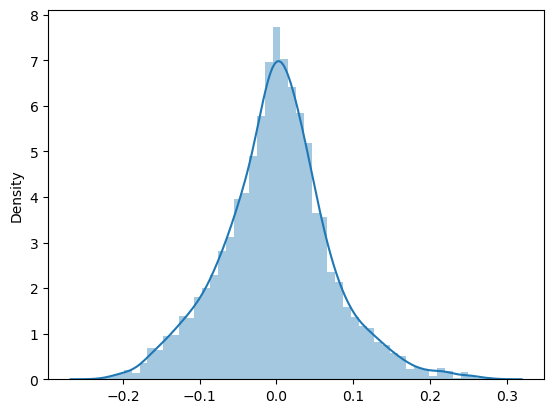

In [117]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(y_train - y_train_SALES_PRICE)
plt.show()

### Making Predictions Using the Final Model

In [118]:
df.head(3)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,House,others
0,4,1004,131,1.0,1.0,3,0,1,44,0,2,0,380000,144400,7600000,0,0
1,1,1986,26,2.0,1.0,5,0,0,11,0,0,3,760122,304049,21717770,0,0
2,0,909,70,1.0,1.0,3,0,1,20,1,0,4,421094,92114,13159200,0,0


In [119]:
num_vars = ['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM','N_ROOM','SALE_COND','Age(House)_Y','UTILITY_AVAIL','STREET','MZZONE','REG_FEE','COMMIS','SALES_PRICE']

df_test[num_vars] = scal.fit_transform(df_test[num_vars])

In [120]:
df_test.describe()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,Age(House)_Y,UTILITY_AVAIL,STREET,MZZONE,REG_FEE,COMMIS,SALES_PRICE,House,others
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,0.492186,0.441353,0.491571,0.215190,0.219409,0.420652,0.504102,0.521331,0.403473,0.513049,0.492733,0.660103,0.315208,0.279753,0.411767,0.342241,0.329114
std,0.303919,0.232915,0.285274,0.269347,0.413943,0.258539,0.350490,0.499662,0.246630,0.378986,0.425301,0.302410,0.172063,0.166140,0.190301,0.474571,0.470002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.240982,0.245000,0.000000,0.000000,0.250000,0.250000,0.000000,0.196078,0.000000,0.000000,0.600000,0.188855,0.158128,0.280291,0.000000,0.000000
50%,0.500000,0.438377,0.490000,0.000000,0.000000,0.500000,0.500000,1.000000,0.392157,0.666667,0.500000,0.800000,0.281769,0.247383,0.381227,0.000000,0.000000
75%,0.666667,0.625752,0.725000,0.333333,0.000000,0.500000,0.750000,1.000000,0.588235,1.000000,1.000000,1.000000,0.405314,0.369949,0.518418,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into x_test and y_test

In [121]:
y_test = df_test.pop('SALES_PRICE')
x_test = df_test

In [122]:
x_test_m7 = sm.add_constant(x_test)

In [123]:
x_test_m7 = x_test_m7.drop(['DIST_MAINROAD','COMMIS','INT_SQFT','N_ROOM','Age(House)_Y','UTILITY_AVAIL'], axis = 1)

In [124]:
y_pred_m7 = lr_7.predict(x_test_m7)

## Model Evaluation

In [125]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test,y_pred = y_pred_m7)

0.8191834197396927